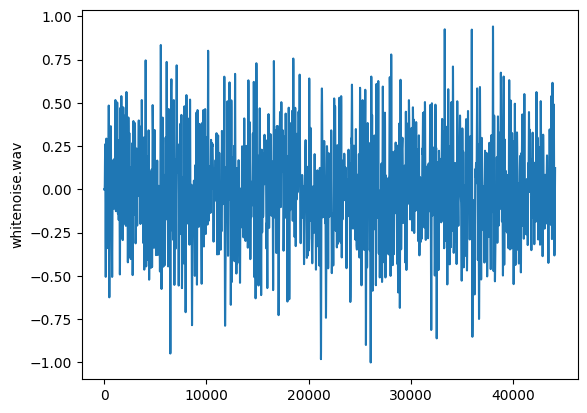

In [1]:
import soundfile as sf
import matplotlib.pyplot as plt

soundfile = 'whitenoise.wav'
desired_sample_rate = 8000.0
desired_resolution = 13
range = 2**desired_resolution - 1

data_in, datasamplerate = sf.read(soundfile)
# This means stereo so extract one channel 0
if len(data_in.shape)>1:
    data_in = data_in[:,0]
plt.plot(data_in)
plt.ylabel(soundfile)
plt.show()



In [2]:
import samplerate
converter = 'sinc_best'  # or 'sinc_fastest', ...
ratio = desired_sample_rate/datasamplerate
data_out = samplerate.resample(data_in, ratio, converter)
print(data_out)
maxValue = max(data_out)
minValue = min(data_out)
print("length", len(data_out))
print("max value", max(data_out))
print("min value", min(data_out))
vrange = (maxValue - minValue) 
print("value range", vrange)

[ 6.7462383e-07 -8.7352242e-07  4.0059282e-07 ...  3.5109550e-02
  7.0300847e-02  1.1930386e-01]
length 8000
max value 0.939694
min value -0.99997383
value range 1.9396678


In [3]:
filename = soundfile[:-4]
m68code = "/*\n    File "+soundfile+ "\r\n*/\r\n\n"
m68code += "#define "+ filename + "_length "+str(len(data_out))+" \r\n\r\n"
m68code += "#define "+ filename + "_sample_rate " + str(int(desired_sample_rate)) + "\r\n\r\n"
m68code += "const uint16_t " + filename + "_data[] = {\r\n    "
maxitemsperline = 16
itemsonline = maxitemsperline
firstvalue = 0
lastvalue = 0
for v in data_out:
    # scale v to between 0 and 1
    isin = (v-minValue)/vrange   
    # scale to between 0 and range
    v = int(isin*range)
    vstr = str(v)
    if (firstvalue==0):
        firstvalue= v
    lastvalue = v
    m68code+=vstr
    itemsonline-=1
    if (itemsonline>0):
        m68code+=','
    else:
        itemsonline = maxitemsperline
        m68code+=',\r\n    '
        
# keep track of first and last values to avoid
# blip when the loop restarts.. make the end value
# the average of the first and last. 
end_value = int( (firstvalue + lastvalue) / 2)
m68code+=str(end_value)+'    \r\n};'
print(m68code)    

/*
    File whitenoise.wav
*/

#define whitenoise_length 8000 

#define whitenoise_sample_rate 8000

const uint16_t whitenoise_data[] = {
    4222,4222,4222,4222,4222,4221,4220,4220,4226,4247,4294,4381,4514,4689,4891,5090,
    5247,5321,5279,5100,4785,4355,3852,3329,2844,2450,2190,2089,2153,2371,2716,3152,
    3633,4116,4558,4925,5198,5370,5450,5456,5410,5336,5256,5184,5127,5081,5040,4995,
    4936,4857,4750,4608,4426,4204,3948,3670,3392,3140,2942,2821,2792,2861,3016,3232,
    3478,3717,3922,4074,4170,4221,4249,4280,4340,4448,4618,4852,5140,5459,5775,6045,
    6222,6264,6138,5828,5342,4712,3992,3255,2580,2042,1700,1589,1714,2052,2554,3155,
    3782,4364,4844,5183,5364,5394,5301,5127,4918,4717,4561,4472,4461,4528,4662,4848,
    5064,5287,5492,5653,5747,5759,5684,5530,5314,5058,4787,4522,4281,4074,3910,3790,
    3711,3665,3637,3610,3564,3482,3353,3174,2952,2705,2461,2254,2121,2091,2182,2396,
    2719,3118,3553,3977,4350,4640,4831,4920,4916,4833,4692,4514,4321,4136,3980,3871,
    3823,383